# BoolForge Tutorial #6: Working with Boolean networks

In this tutorial, we will xxx

In [1]:
import boolforge
import numpy as np
import networkx as nx

## Structural decomposition of wiring diagrams

Some wiring diagrams (and Boolean networks built upon these wiring diagrams) can be decomposed into multiple *strongly connected components* (SCCs). SCCs have recently been equated to biological modules (Kadelka et al., Journal of Royal Society Interface, 2023). The class `WiringDiagram` contains methods to perform this decomposition into SCCs and to identify the *directed acyclic graph* (i.e., the *modular structure*) underlying this structural decomposition. Later, when working with Boolean networks, this structural decomposition of the wiring diagram implies a decomposition of the dynamics, facilitating the identification of network dynamics and effective controls.

To exemplify this, we define a wiring diagram with 6 nodes, which can be decomposed into three SCCs.

W.N: 6
W.variables: ['x0' 'x1' 'x2' 'x3' 'x4' 'x5']
W.indegrees: [1 1 1 2 2 1]
W.outdegrees: [1 2 2 1 1 1]
W.N_constants: 0
W.N_variables: 6
SCCs: [{3, 4, 5}, {0, 1}, {2}]
directed acyclic graph of SCCs: {(1, 0), (2, 0)}


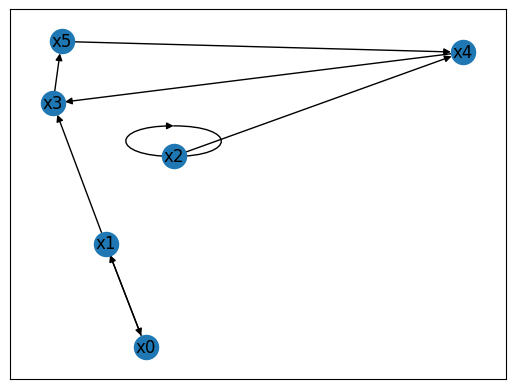

In [5]:
#Wiring diagram of a 6-node network
I = [[1],
     [0],
     [2],
     [1,4],
     [2,5],
     [3]]

#Create an instance of WiringDiagram
W = boolforge.WiringDiagram(I=I)

#Print basic properties
print(f'W.N: {W.N}')
print(f'W.variables: {W.variables}')
print(f'W.indegrees: {W.indegrees}')
print(f'W.outdegrees: {W.outdegrees}')
print(f'W.N_constants: {W.N_constants}')
print(f'W.N_variables: {W.N_variables}')

#Print SCCs and directed acyclic graph structure between SCCs
sccs = W.get_strongly_connected_components()
dag = W.get_modular_structure()
print(f'SCCs: {sccs}')
print(f'directed acyclic graph of SCCs: {dag}')

#Plot the wiring diagram
DiGraph = W.generate_networkx_graph()
nx.draw_networkx(DiGraph, with_labels=True, arrows=True)

The function `get_strongly_connected_components()` uses the `networkx` library to return a unordered list of sets, each set containing the indices of the variables in one SCC. The function `get_modular_structure` provides the partial order between the elements in this list. In the above example, the identified SCCs are $\{x_3, x_4, x_5\}$, $\{x_0, x_1\}$, $\{x_2\}$, and the modular structure is such that SCC $\{x_0, x_1\}$ as well as SCC $\{x_2\}$ are upstream of SCC $\{x_3, x_4, x_5\}$. That means that at least one node in each of the upstream SCCs regulates at least one nodes in the downsteam SCC.